**1. Problem statements.**

**Load the data (It should have at least 100 rows.) and get familiar with it. Describe the data source and include its link.**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('ds_salaries.csv')


data source: Data Science Job Salaries.

| Column             | Description                                                  |
| :----------------- | :----------------------------------------------------------- |
| work_year          | The year the salary was paid.                                |
| experience_level   | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type    | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance |
| job_title          | The role worked in during the year.                          |
| salary             | The total gross salary amount paid.                          |
| salary_currency    | The currency of the salary paid as an ISO 4217 currency code. |
| salary*in*usd      | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| remote_ratio       | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location   | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size       | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |

link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

**List out three questions you want to investigate from this dataset. These questions could be a trend, a comparison between different groups of a categorical feature, a relationship between two variables, or a distribution of a numerical variable.**

Remote Working ratio has improved since COVID 19. As this data sets have ratio rate in data science work field from 2019 to 2022, it is proper to find some result that I had interests.

1. How much salary difference depends on part of 'remote_ratio'? & What is the biggest group of 'remote_ratio' in the field of data science?

2. How to explain the trend of the remote ratio?

3. Is there a difference in "remote_ratio" according to "experience level"? If there is a difference, can it be said that it made a difference in the salary?

**2. Data cleaning.**

**Follow the data cleaning steps to clean the data.
    a. Drop any unwanted features if necessary.
    b. Address any missing values
    c. Remove duplicates if necessary.
    d. Check the data type of each column.
    e. For categorical variables, check if there are any inconsistent inputs. d. For numeric variables, check any outliers.  20 points**

In [2]:
# a. Drop any unwanted features if necessary.
df_dropedfeature = df.drop(['job_title', 'salary', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], axis=1)
df_dropedfeature.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'salary_in_usd', 'remote_ratio'],
      dtype='object')

In [3]:
# b. Address any missing values
print(df_dropedfeature.isnull().sum())

# this datas don't have any missing value.s

Unnamed: 0          0
work_year           0
experience_level    0
employment_type     0
salary_in_usd       0
remote_ratio        0
dtype: int64


In [4]:
# c. Remove duplicates if necessary.

# this datas don't have any duplicated low.

In [5]:
# d. Check the data type of each column.

print(df_dropedfeature.shape)
print(df_dropedfeature.columns.tolist())
print(df_dropedfeature.dtypes)

(607, 6)
['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'salary_in_usd', 'remote_ratio']
Unnamed: 0           int64
work_year            int64
experience_level    object
employment_type     object
salary_in_usd        int64
remote_ratio         int64
dtype: object


In [6]:
# e. For categorical variables, check if there are any inconsistent inputs.

# Intermediate SE Senior-level & Expert EX Executive-level doesn't have discreteable difference. change EX to SE
df_rename = df_dropedfeature.replace({"EX": "SE"})

# remote ratio is categorical value. Let's change remote ratio as categorical value.
df_rename = df_rename.replace({0: "No remote work (less than 20%)", 50: "Partially remote", 100: "Fully remote (more than 80%)"})

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


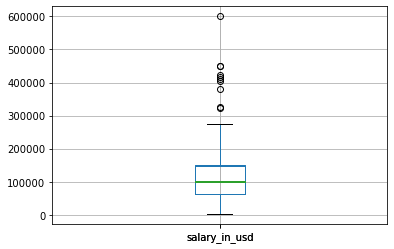

In [7]:
# f. For numeric variables, check any outliers.

print(df_rename.boxplot(column = 'salary_in_usd'))

index1 = df_rename[df_rename ['salary_in_usd'] > 300000].index
df_rename.drop(index1, inplace=True)
print(df_rename.boxplot(column = 'salary_in_usd'))

**3. Exploratory data Analysis and Interpretation of the results.** 

**Process the data. Generate the result you want.
Create a graph to visualize the result. 
Interpret the result. Explain your findings.**


In [8]:
#1. How much salary difference depends on part of 'remote_ratio'? 
# What is the biggest group of 'remote_ratio' in the field of data science?

pivot1 = pd.pivot_table(df_rename, values = ['salary_in_usd'], index = ['remote_ratio'], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot1

,salary_in_usd
remote_ratio,
Fully remote (more than 80%),116204.530831
No remote work (less than 20%),103627.277778
Partially remote,77331.428571


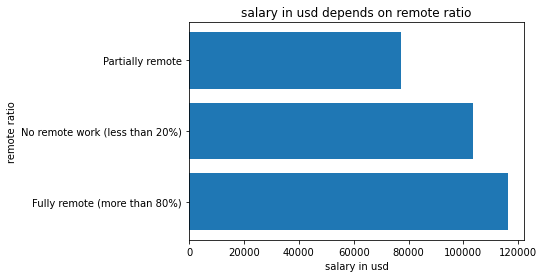

In [9]:
pivot1.reset_index(inplace=True) #Change pivottable to database.

plt.barh(pivot1.iloc[:, 0], pivot1.iloc[:, 1])
plt.ylabel('remote ratio')
plt.xlabel('salary in usd')
plt.title('salary in usd depends on remote ratio')


plt.show()

To begin with, this data sperated the remote ratio into 3 parts depends on the percentage of remote work ratio. The group the remote-works less than 20% is called as No remote work. The group the remote-works from 20% to 80% is called as partially remote. The group the remote-works more than 80% is called as Fully remote. According to this graph, Fully remote group has the biggest slary and No remote work group gets second salary. Partially group gets the lowest salary. The standard of slary is avarage of salary in each group. Salary avarage in the partially remote group is only 66.55% of Fully remote group's salary avarage.

In [10]:
pivot2 = pd.pivot_table(df_rename, values = ['salary_in_usd'], index = ['remote_ratio'], aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot2


,salary_in_usd
remote_ratio,
Fully remote (more than 80%),373
No remote work (less than 20%),126
Partially remote,98


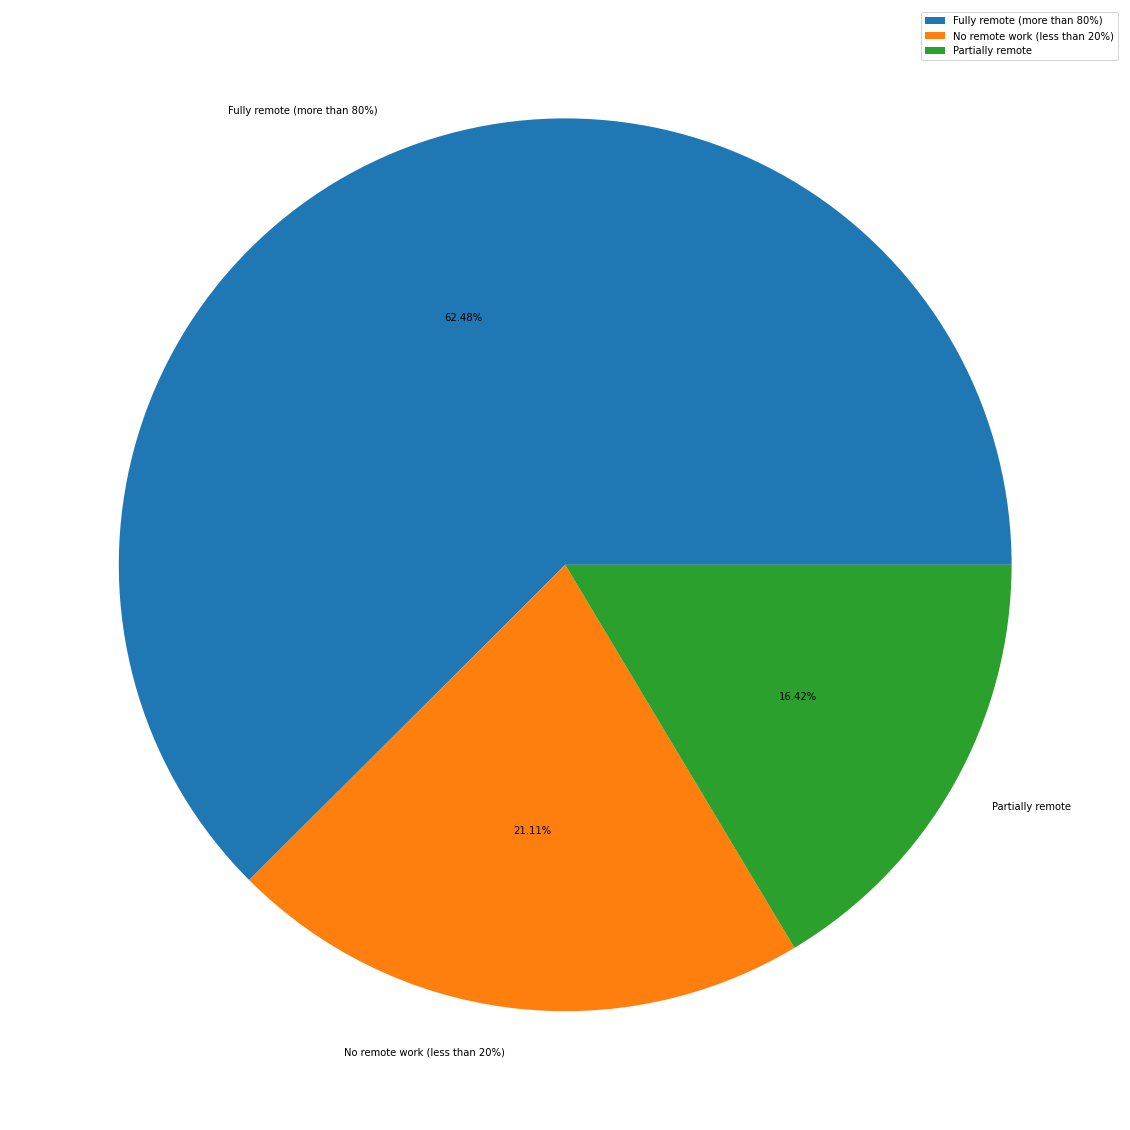

In [11]:
pivot2.reset_index(inplace=True) #Change pivottable to database.

plt.figure(figsize = (20,30))
plt.pie(pivot2.iloc[:, 1], labels = pivot2.iloc[:, 0], autopct = '%.2f%%')
plt.legend(pivot2.iloc[:, 0], loc='best')

plt.legend()
plt.show()

The bigest part in pie chart is Fully remote. 62.48% of datas is belong to Full remote. The second bigest part in pie chart is No remote work. 21.11% of datas is belong to No remote work. The lowest part in pie chart is Partially remote. Only 16.42% of datas is belong to Partially remote. If we connect prior bar graph and this pie graph, Fully remote group gets the largest salary even though this group's number of amount is the largest too. Also, we can find Fully remote is the most popular work type since 2020.

In [12]:
# 2. How to explain the trend of the remote ratio?

pivot3 = pd.pivot_table(df_rename, values = ['salary_in_usd'], index = ['remote_ratio', 'work_year'], aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot3.reset_index(inplace=True) #Change pivottable to database.

pivot3

,remote_ratio,work_year,salary_in_usd
0,Fully remote (more than 80%),2020,34
1,Fully remote (more than 80%),2021,114
2,Fully remote (more than 80%),2022,225
3,No remote work (less than 20%),2020,14
4,No remote work (less than 20%),2021,34
5,No remote work (less than 20%),2022,78
6,Partially remote,2020,21
7,Partially remote,2021,65
8,Partially remote,2022,12


([<matplotlib.axis.YTick at 0x1325bae64f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

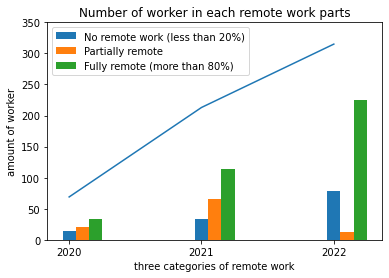

In [13]:
col = [2020, 2021, 2022]
ind = ['No remote work (less than 20%)' , 'Partially remote', 'Fully remote (more than 80%)']
con = [[14, 34, 78], [21,65,12], [34, 114, 225]]
df = pd.DataFrame(con, columns=col, index=ind)
df

total_enrol = [sum(df.iloc[:, 0]),sum(df.iloc[:, 1]), sum(df.iloc[:, 2])]
total_enrol

width = 0.1
x_axis = np.arange(0,3)

plt.bar(x_axis, df.iloc[0, :], width = width)
plt.bar(x_axis+0.1, df.iloc[1, :], width = width)
plt.bar(x_axis+0.1*2, df.iloc[2, :], width = width)

plt.xlabel('three categories of remote work')
plt.ylabel('amount of worker')
plt.title('Number of worker in each remote work parts')
plt.legend(df.index[0:3], loc = 'best') 

plt.plot(total_enrol)

plt.xticks(x_axis, df.columns[0:3])
plt.yticks(np.arange(0, 400, 50))

The line graph means total counts of workers in data science field. The workers in data science field has steadily improved since 2020. The blue bar graph means No remote worker's number. they has improved but the increasing trend is not rapidly like total workers' number in data science field. Partially remote workers in data science field improved in 2021 but they decreased 2022 compared to 2020 and 2021. The green bar graph means the number of workers in fully remote parts in the data science field. they has increased since 2020. Also, their increasing trend seems rapidly like total numbers of workers in data science fields.

In [14]:
# 3. Is there a difference in "remote_ratio" according to "experience level"?
# If there is a difference, can it be said that it made a difference in the salary?

condition1 = (df_rename.remote_ratio == "Fully remote (more than 80%)")
condition2 = (df_rename.remote_ratio == "Partially remote")
condition3 = (df_rename.remote_ratio == "No remote work (less than 20%)")

df_c1 = df_rename.loc[condition1]
df_c2 = df_rename.loc[condition2]
df_c3 = df_rename.loc[condition3]

In [21]:
pivot4 = pd.pivot_table(df_c1, values = ['salary_in_usd'], index = ['experience_level'], aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot4.reset_index(inplace=True) #Change pivottable to database.

pivot4

,experience_level,salary_in_usd
0,EN,49
1,MI,114
2,SE,210


In [22]:
pivot5 = pd.pivot_table(df_c2, values = ['salary_in_usd'], index = ['experience_level'], aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot5.reset_index(inplace=True) #Change pivottable to database.

pivot5

,experience_level,salary_in_usd
0,EN,25
1,MI,41
2,SE,32


In [23]:
pivot6 = pd.pivot_table(df_c3, values = ['salary_in_usd'], index = ['experience_level'], aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot6.reset_index(inplace=True) #Change pivottable to database.

pivot6

,experience_level,salary_in_usd
0,EN,14
1,MI,55
2,SE,57


In [24]:
pivot7 = pd.pivot_table(df_rename, values = ['salary_in_usd'], index = ['experience_level'], aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot7.reset_index(inplace=True) #Change pivottable to database.

pivot7

,experience_level,salary_in_usd
0,EN,88
1,MI,210
2,SE,299


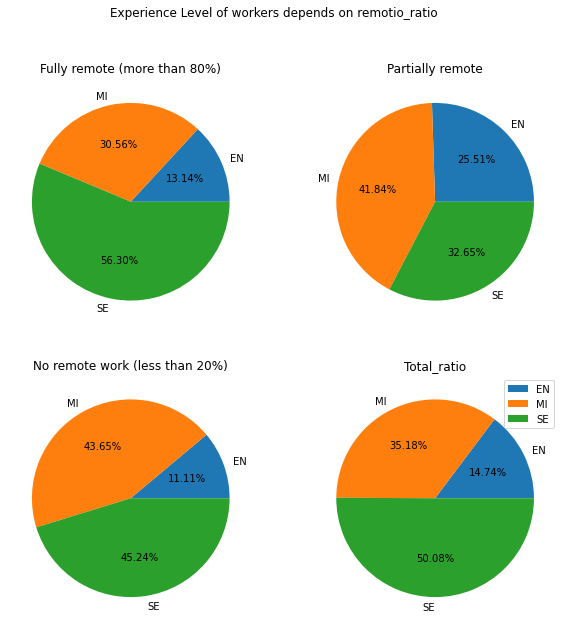

In [51]:
# Q10. Change the above bar chart to four subplots. Each subplot shows the change of enrollment number of each group. 10 points.


fig, axes = plt.subplots(2,2, sharex = False, sharey = False, figsize = (10,10))
# This creates a 2*2 canvas for subplots
x_axis = ['EN', 'MI', 'SE']
    
axes[0, 0].pie(pivot4.iloc[:, 1], labels = pivot4.iloc[:, 0], autopct = '%.2f%%')
axes[0, 0].set_title("Fully remote (more than 80%)")

axes[0, 1].pie(pivot5.iloc[:, 1], labels = pivot5.iloc[:, 0], autopct = '%.2f%%')
axes[0, 1].set_title("Partially remote")

axes[1, 0].pie(pivot6.iloc[:, 1], labels = pivot6.iloc[:, 0], autopct = '%.2f%%')
axes[1, 0].set_title("No remote work (less than 20%)")

axes[1, 1].pie(pivot7.iloc[:, 1], labels = pivot7.iloc[:, 0], autopct = '%.2f%%')
axes[1, 1].set_title("Total_ratio")

fig.suptitle('Experience Level of workers depends on remotio_ratio')

plt.legend(pivot5.iloc[:, 0], loc='best')

plt.show()

According to these pie charts, employees who have senior level are the largest part of fully remote employee group. We can check that 56.30% of fully remote employees are senior level, 30.56% of fully remote employees are Mid-level and only 13.14% of fully remote employees are Entry-level. We can check that 45.24% of No remote work group are senior level, 43.65% of No remote work group are Mid-level and only 11.11% of No remote work group are Entry-level. On the other side Mid-level is the bigest parts in partially remote group(41.84%). Also, partially remote group has smallest percentage of senior-level employee compared to other groups(32.65%). Also they have the largest percentage of entry-level employees compared to other group. 
The last pie chart is belong to all of employees' experience level. senior level employees are 50.08% of employees. Mid-level is 35.18%, Entry level is only 14.74%. Partially remote has difference on the percentage of experience level. By this result, I guessed the difference of salary in remote group is resulted from the experience level ratio in each group. The next study will show the salary difference depends on experience level.

  experience_level  salary_in_usd
0               EN   61643.318182
1               MI   82953.142857
2               SE  137575.367893


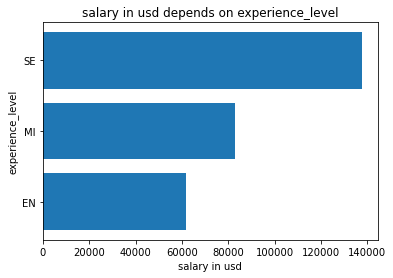

In [55]:
pivot8 = pd.pivot_table(df_rename, values = ['salary_in_usd'], index = ['experience_level'], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort = True)
pivot8.reset_index(inplace=True) #Change pivottable to database.

plt.barh(pivot8.iloc[:, 0], pivot8.iloc[:, 1])
plt.ylabel('experience_level')
plt.xlabel('salary in usd')
plt.title('salary in usd depends on experience_level')

print(pivot8)
plt.show()

As expected, senior-level workers are paid much higher than entry-level and mid-level workers. Senior-level workers' avarage of salary is 137575 USD. Mid-level workers' avarage of salary is 82953 USD. Entry-level workers' avarage of salary is 61643 USD. it is almost twice higher than other groups' salary. Fully remote group has the largest percentage of senior-level compared to other group. It might have worked as a result of salary difference.

**4. Summary.**

**Sumarize the main findings from this project as well as what you failed to find from the results. Describe what you want to further explore about the topic.**

Fully remote group is the group that gets the largest salary compared to other groups. No remote work group is second. Also, Salary avarage in the partially remote group is only 66.55% of Fully remote group's salary avarage.

The bigest number of workers' group is Fully remote group. 62.48% of workers do the fully remoter group. Also, the trend has improved.

The bigest parts of fully remote workers are senior level workers. Percentage of senior-level and mid-level workers in no remote workers are similar to each others. Relatively, entry level workers has big percentages of partially remote group compared to other groups. 

But I failed what something exactly caused on difference between each remote group's sallary. I should find more relationship between remote work and company size or employment_type to find other reason that resulted in difference in salary between remote group.

Also, If I had remote group datas as numeric value, I should have used scatter plot to find some linear relationship or negative or positive relationship. Though,the datas already organized as categorical values.

**5. Upload it to your Github repository.**

**Then include a link to your Github repository and upload the entire Jupyter-notebook file to Moodle.**